In [32]:
import numpy as np
import pandas as pd
#for plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#for splitting, scaling and training 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#for evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical


In [19]:
df = pd.read_csv("data.csv")


In [20]:
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [23]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


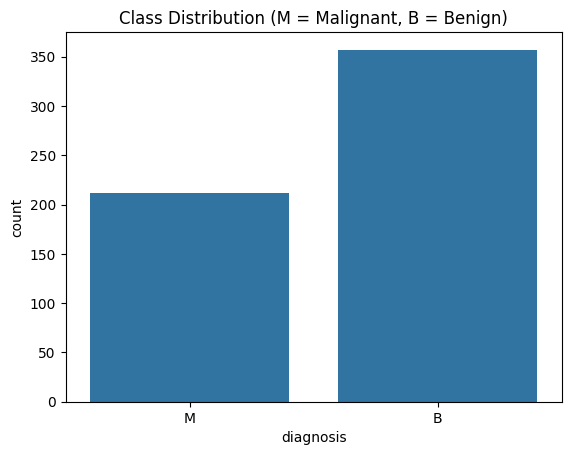

diagnosis
B    357
M    212
Name: count, dtype: int64

In [24]:
#checking the distribution (reasonably balanced)
sns.countplot(x=df['diagnosis'])
plt.title("Class Distribution (M = Malignant, B = Benign)")
plt.show()

df['diagnosis'].value_counts()

In [25]:
#assigning malignant or benign binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#splitting feature and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(X.shape, y.shape)



(569, 30) (569,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
# Create KNN model
knn = KNeighborsClassifier(
    n_neighbors=1,    # pour correspondre à 1-NN
    metric='manhattan' # distance L1
)

# Train
knn.fit(X_train_scaled, y_train)

# Predict on scaled data
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate accuracy & classification report
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Function to calculate all metrics
def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    return {
        'Accuracy': accuracy,
        'FPR': fpr,
        'FNR': fnr,
        'TPR': tpr,
        'TNR': tnr
    }

# Calculate metrics
train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

# Display metrics
print("\nTraining Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.4f}")

print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

Test Accuracy: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Training Metrics:
Accuracy: 1.0000
FPR: 0.0000
FNR: 0.0000
TPR: 1.0000
TNR: 1.0000

Test Metrics:
Accuracy: 0.9591
FPR: 0.0280
FNR: 0.0625
TPR: 0.9375
TNR: 0.9720


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ SVM_Layer (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1918 - loss: 0.6488 - val_accuracy: 0.2250 - val_loss: 0.2762
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3522 - loss: 0.1944 - val_accuracy: 0.2250 - val_loss: 0.2405
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3616 - loss: 0.1175 - val_accuracy: 0.2250 - val_loss: 0.2323
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3711 - loss: 0.0788 - val_accuracy: 0.2250 - val_loss: 0.2230
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3742 - loss: 0.0609 - val_accuracy: 0.2250 - val_loss: 0.2097
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3742 - loss: 0.0526 - val_accuracy: 0.2250 - val_loss: 0.1974
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3742 - loss: 0.0476 - val_accuracy: 0.2250 - val_loss: 0.1896
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3742 - loss: 0.0437 - val_accuracy: 0.2250 - 

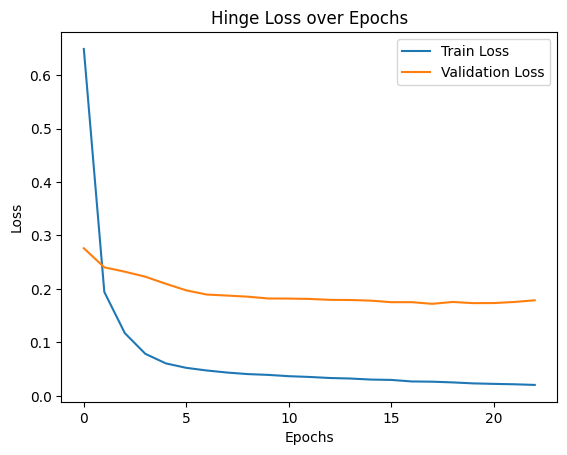

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training Accuracy: 0.9774
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Test Accuracy: 0.9766
TPR (Recall): 0.9375
TNR (Specificity): 1.0000
FPR: 0.0000
FNR: 0.0625

Classification Report:
                precision    recall  f1-score   support

   Benign (-1)       0.96      1.00      0.98       107
Malignant (+1)       1.00      0.94      0.97        64

      accuracy                           0.98       171
     macro avg       0.98      0.97      0.97       171
  weighted avg       0.98      0.98      0.98       171



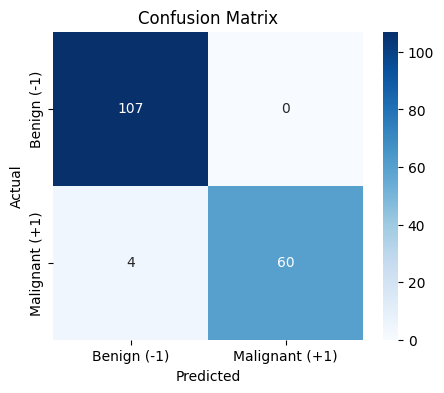

In [ ]:
# MODEL GRU-SVM
# 2. Convert labels to -1 / +1 for hinge loss (SVM-style)

y_train_svm = y_train.copy()
y_train_svm[y_train_svm == 0] = -1
y_test_svm = y_test.copy()
y_test_svm[y_test_svm == 0] = -1

# Convert to numpy arrays: TensorFlow/Keras works best with numpy arrays rather than pandas Series.
y_train_svm_np = y_train_svm.to_numpy() if hasattr(y_train_svm, 'to_numpy') else y_train_svm
y_test_svm_np = y_test_svm.to_numpy() if hasattr(y_test_svm, 'to_numpy') else y_test_svm


# 3. Build GRU-SVM-inspired model

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],), name='Input_Layer'),
    layers.Dense(64, activation='tanh', name='Hidden_Layer_1'),
    layers.Dense(32, activation='tanh', name='Hidden_Layer_2'),
    layers.Dense(1, activation='linear', name='SVM_Layer')  # linear for hinge loss: One neuron gives a single continuous score: score >= 0 → class 1 /score < 0 → class -1
])

# Compile with hinge loss
model.compile(
    optimizer='adam',
    loss='hinge',
    metrics=['accuracy']
)
model.summary()

# 4. Early stopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


# 5. Train the model

history = model.fit(
    X_train_scaled, y_train_svm_np,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


# 6. Plot loss curve

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Hinge Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Predict on training and test sets

# Training predictions
y_train_pred_scores = model.predict(X_train_scaled)
y_train_pred = np.where(y_train_pred_scores >= 0, 1, -1).flatten()
train_accuracy = accuracy_score(y_train_svm_np, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test predictions
y_test_pred_scores = model.predict(X_test_scaled)
y_test_pred = np.where(y_test_pred_scores >= 0, 1, -1).flatten()

# 8. Evaluate test set

accuracy = accuracy_score(y_test_svm_np, y_test_pred)
cm = confusion_matrix(y_test_svm_np, y_test_pred, labels=[-1, 1])
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"TNR (Specificity): {tnr:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"FNR: {fnr:.4f}")

# Optional: Classification report
print("\nClassification Report:")
print(classification_report(y_test_svm_np, y_test_pred, target_names=['Benign (-1)', 'Malignant (+1)']))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Benign (-1)', 'Malignant (+1)'],
            yticklabels=['Benign (-1)', 'Malignant (+1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Train MSE: 0.0527
Test MSE: 0.0582
Test Accuracy: 0.9766

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       107
   Malignant       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



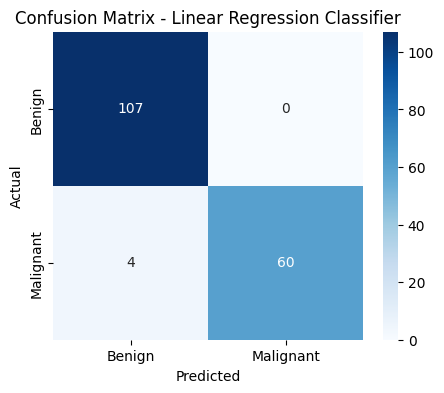

In [42]:
# 4. Train Linear Regression (used as classifier)
# -----------------------------------------
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# -----------------------------------------
# 5. Predict continuous outputs (regression values)
# -----------------------------------------
y_train_pred_cont = reg.predict(X_train_scaled)
y_test_pred_cont = reg.predict(X_test_scaled)

# -----------------------------------------
# 6. Apply threshold (Eq. 8)
# If output >= 0.5 → class 1
# Else → class 0
# -----------------------------------------
y_train_pred = (y_train_pred_cont >= 0.5).astype(int)
y_test_pred = (y_test_pred_cont >= 0.5).astype(int)

# -----------------------------------------
# 7. Compute Regression Loss (MSE)
# -----------------------------------------
train_mse = mean_squared_error(y_train, y_train_pred_cont)
test_mse = mean_squared_error(y_test, y_test_pred_cont)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# -----------------------------------------
# 8. Classification Metrics
# -----------------------------------------
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant']))

# -----------------------------------------
# 9. Plot Confusion Matrix
# -----------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear Regression Classifier")
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,001 (1.97 MB)

 Trainable params: 517,001 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8491 - loss: 1.4702 - val_accuracy: 0.9250 - val_loss: 1.2397
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9623 - loss: 1.1450 - val_accuracy: 0.9125 - val_loss: 1.2079
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9717 - loss: 1.0527 - val_accuracy: 0.9500 - val_loss: 1.1554
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9811 - loss: 0.9894 - val_accuracy: 0.9375 - val_loss: 1.1227
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.9337 - val_accuracy: 0.9375 - val_loss: 1.0853
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9811 - loss: 0.8885 - val_accuracy: 0.9250 - val_loss: 1.0417
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9874 - loss: 0.8432 - val_accuracy: 0.9375 - val_loss: 1.0035
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9906 - loss: 0.8012 - val_accuracy: 0.9375 - 

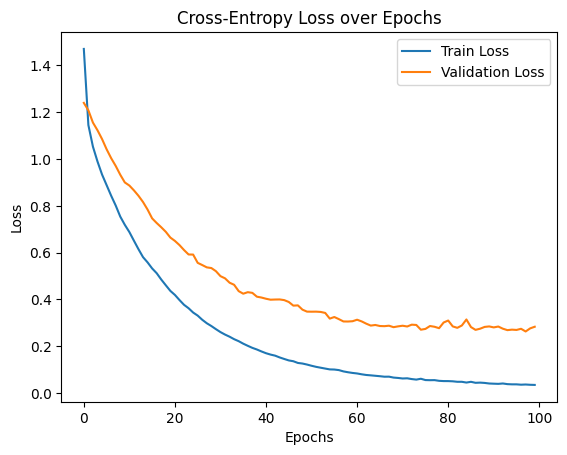

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Accuracy: 0.9899
Test Accuracy: 0.9883


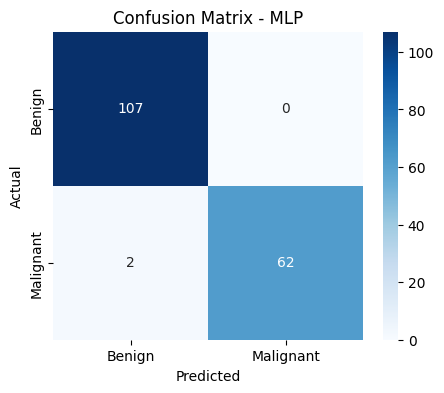


Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       107
   Malignant       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [17]:
#Build the MLP model

model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    
    layers.Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.4),

    layers.Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.4),

    layers.Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

# Compile with cross-entropy loss
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------
# 5. Early stopping
# -----------------------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=13,
    restore_best_weights=True
)

# -----------------------------------------
# 6. Train the model
# -----------------------------------------
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------------------
# 7. Plot loss curve
# -----------------------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# -----------------------------------------
# 8. Predict and evaluate
# -----------------------------------------
y_train_pred = (model.predict(X_train_scaled) >= 0.5).astype(int).flatten()
y_test_pred = (model.predict(X_test_scaled) >= 0.5).astype(int).flatten()

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Test accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant']))









Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62 (248.00 B)

 Trainable params: 62 (248.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5597 - loss: 0.8157 - val_accuracy: 0.5875 - val_loss: 0.9090
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6415 - loss: 0.6967 - val_accuracy: 0.6500 - val_loss: 0.7824
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7107 - loss: 0.6018 - val_accuracy: 0.7000 - val_loss: 0.6791
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7673 - loss: 0.5252 - val_accuracy: 0.7375 - val_loss: 0.5976
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.4669 - val_accuracy: 0.7625 - val_loss: 0.5323
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8019 - loss: 0.4196 - val_accuracy: 0.7625 - val_loss: 0.4802
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8459 - loss: 0.3810 - val_accuracy: 0.8000 - val_loss: 0.4391
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8711 - loss: 0.3508 - val_accuracy: 0.8625 - 

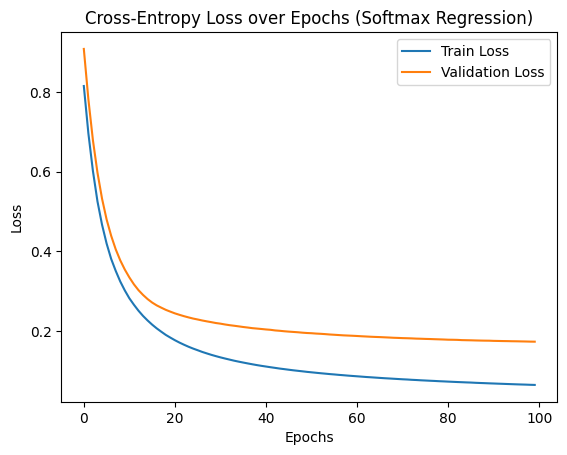

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Accuracy: 0.9749
Test Accuracy: 0.9825


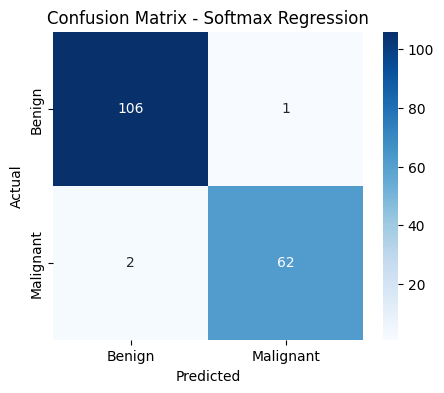


Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       107
   Malignant       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [29]:
# -----------------------------------------
# 1. One-hot encode labels (Softmax needs this)
# -----------------------------------------
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


# -----------------------------------------
# 2. Build the SOFTMAX REGRESSION model
# -----------------------------------------
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Softmax Regression = 1 linear layer
    layers.Dense(2, activation='softmax')  
])


# -----------------------------------------
# 3. Compile with categorical cross entropy
# -----------------------------------------
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


# -----------------------------------------
# 4. Early stopping
# -----------------------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=13,
    restore_best_weights=True
)


# -----------------------------------------
# 5. Train the model
# -----------------------------------------
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)


# -----------------------------------------
# 6. Plot loss curve
# -----------------------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss over Epochs (Softmax Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# -----------------------------------------
# 7. Predict and evaluate
# -----------------------------------------
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1)
y_test_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Test accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")


# -----------------------------------------
# 8. Confusion matrix
# -----------------------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Softmax Regression")
plt.show()


# -----------------------------------------
# 9. Classification report
# -----------------------------------------
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=['Benign', 'Malignant']
))

Train Accuracy (SVM): 0.9874
Test Accuracy  (SVM): 0.9708


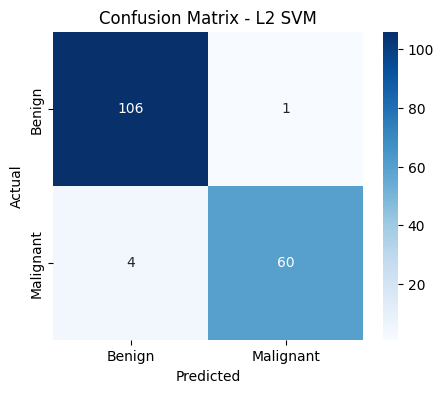


Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       107
   Malignant       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [37]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Convert labels from {0,1} → {-1, +1} for SVM math
# ---------------------------------------------------
y_train_svm = np.where(y_train == 0, -1, 1)
y_test_svm  = np.where(y_test == 0, -1, 1)

# ---------------------------------------------------
# 2. Build L2-SVM (squared hinge loss)
# ---------------------------------------------------
svm_model = Pipeline([
    ('scaler', StandardScaler()),   # SVM requires scaling
    ('svm', LinearSVC(
        loss='squared_hinge',       # L2-SVM (smooth + stable)
        C=1.0,                      # Penalty parameter
        max_iter=5000
    ))
])

# ---------------------------------------------------
# 3. Train the model
# ---------------------------------------------------
svm_model.fit(X_train, y_train_svm)

# ---------------------------------------------------
# 4. Predict
# ---------------------------------------------------
# Predict labels {-1, +1}
y_test_pred_svm = svm_model.predict(X_test)
y_train_pred_svm = svm_model.predict(X_train)

# Convert back to {0,1} for metrics
y_test_pred = np.where(y_test_pred_svm == -1, 0, 1)
y_train_pred = np.where(y_train_pred_svm == -1, 0, 1)

# ---------------------------------------------------
# 5. Accuracy
# ---------------------------------------------------
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy (SVM): {train_accuracy:.4f}")
print(f"Test Accuracy  (SVM): {test_accuracy:.4f}")

# ---------------------------------------------------
# 6. Confusion matrix
# ---------------------------------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - L2 SVM")
plt.show()

# ---------------------------------------------------
# 7. Classification Report
# ---------------------------------------------------
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=['Benign', 'Malignant']
))
